# Composer Statistics

In this Notebook we use our scraped data to get some insights about the people who composed the music in our dataset.

In [1]:
import pandas as pd

# navigating directories
import os

# plotting
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns


# progress bars
from tqdm import tqdm
tqdm.pandas()

sns.set_style('white')

# Preparations for Exporting Plots

In [2]:
def export_and_plot(fig, file_name, width):
    path = os.path.join('plots', f'{file_name}.json')
    json_data = fig.to_json()
    with open(path, 'w') as f:
            f.write(json_data)

    fig.update_layout(width=width)
    fig.show()

# Import Composer Data and Inspect Variables

In [3]:
# import composer dataset (obtained by scraping Musicalics and Composers-Classical-Music)
wd = os.getcwd()
comp_path = os.path.join(wd, 'data', 'data_sets', 'scraped_composer_data_cleaned.csv')
comp_df = pd.read_csv(comp_path, index_col='composer')

# make town names consistent
comp_df = comp_df.replace({
    'Roma':'Rome',
    'Venezia':'Venice',
    'Greenwich':'London',
    'Westminster':'London',
    'Firenze':'Florence',
    'Genua':'Genoa',
    'Milano':'Milan',
    'Napoli':'Naples',
    'Mantova':'Mantua',
    'Doornik':'Tournai',
    'Liege':'Liège',
    'Nürnberg':'Nuremberg',
    'Seville':'Sevilla',
    'München':'Munich'
})

comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, Karl Friedrich Abel to Francesco Vindella
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_of_birth  319 non-null    float64
 1   birth_town     238 non-null    object 
 2   birth_country  262 non-null    object 
 3   date_of_death  333 non-null    float64
 4   death_town     236 non-null    object 
 5   death_country  171 non-null    object 
 6   nationality    382 non-null    object 
dtypes: float64(2), object(5)
memory usage: 34.4+ KB


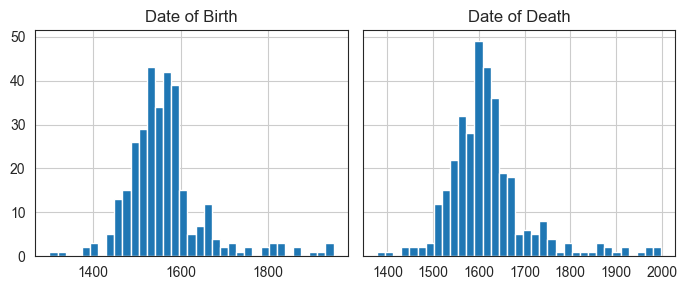

In [4]:
# plot date of birth and death
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7,3), sharey=True)
comp_df.date_of_birth.hist(bins=35, ax=axs[0])
axs[0].set_title('Date of Birth')
comp_df.date_of_death.hist(bins=35, ax=axs[1])
axs[1].set_title('Date of Death')
plt.tight_layout()
plt.show()

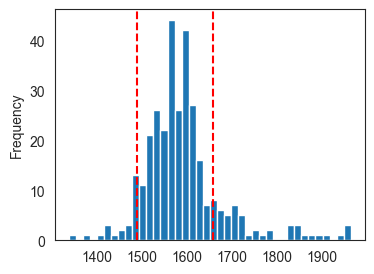

In [5]:
# define and plot active year as middle point between year of birth and death
comp_df['active_year'] = (comp_df['date_of_death'] + comp_df['date_of_birth']) / 2
comp_df.loc['Francesco Spinacino', 'active_year'] = 1507

fig = plt.figure(figsize=(4,3))
comp_df.active_year.plot(kind='hist', bins=40)
plt.axvline(x=1490, color='r', linestyle='dashed')
plt.axvline(x=1660, color='r', linestyle='dashed')
plt.show()

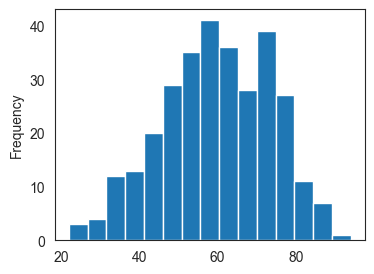

In [6]:
# plot age of death
comp_df['age_of_death'] = comp_df['date_of_death'] - comp_df['date_of_birth']

fig = plt.figure(figsize=(4,3))
comp_df.query('age_of_death > 20').age_of_death.plot(kind='hist', bins=15)
plt.show()

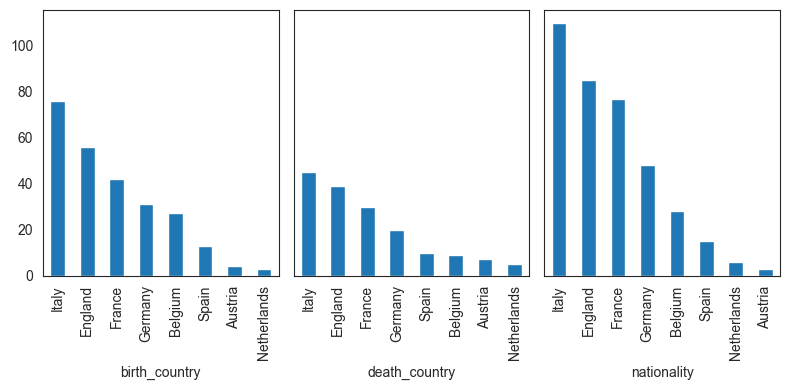

In [7]:
# country of birth and death and nationality
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8,4), sharey=True)
comp_df.birth_country.value_counts()[:8].plot(kind='bar', ax=axs[0])
comp_df.death_country.value_counts()[:8].plot(kind='bar', ax=axs[1])
comp_df.nationality.value_counts()[:8].plot(kind='bar', ax=axs[2])
plt.tight_layout()
plt.show()

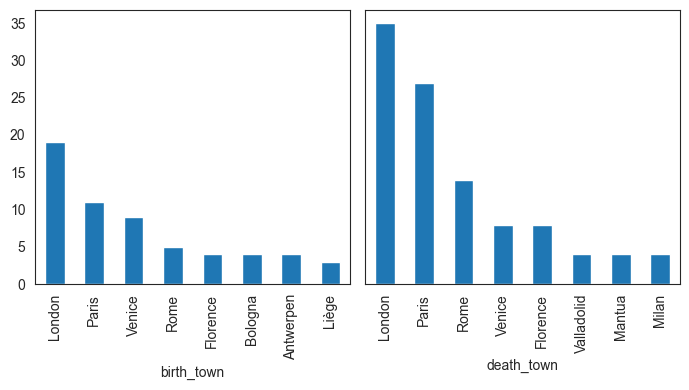

In [8]:
# important towns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7,4), sharey=True)
comp_df.birth_town.value_counts()[:8].plot(kind='bar', ax=axs[0])
comp_df.death_town.value_counts()[:8].plot(kind='bar', ax=axs[1])
plt.tight_layout()
plt.show()

In [9]:
birth_towns = comp_df.birth_town.value_counts().reset_index()
birth_towns.columns = ['town', 'count']
birth_towns = birth_towns.groupby('count').size().reset_index()
birth_towns.columns = ['births_per_town', 'count']
birth_towns['births'] = birth_towns['births_per_town'] * birth_towns['count']
frac_b = birth_towns['births'].iloc[:1].sum() / birth_towns['births'].sum()
frac_b = round(frac_b * 100)

death_towns = comp_df.death_town.value_counts().reset_index()
death_towns.columns = ['town', 'count']
death_towns = death_towns.groupby('count').size().reset_index()
death_towns.columns = ['deaths_per_town', 'count']
death_towns['deaths'] = death_towns['deaths_per_town'] * death_towns['count']
frac_d = death_towns['deaths'].iloc[:1].sum() / death_towns['deaths'].sum()
frac_d = round(frac_d * 100)

print(f'{frac_b}% of composers were born in a town where no other composer was born.')
print(f'{frac_d}% of composers died in a town where no other composer died.')

54% of composers were born in a town where no other composer was born.
29% of composers died in a town where no other composer died.


In [10]:
both_towns = comp_df.query('~birth_town.isna() and ~death_town.isna()')
changed_town = len(both_towns.query('birth_town != death_town')) / len(both_towns)
changed_town = round(changed_town * 100)

both_countries = comp_df.query('~birth_country.isna() and ~death_country.isna()')
changed_country = len(both_countries.query('birth_country != death_country')) / len(both_countries)
changed_country= round(changed_country * 100) 

print(f'{changed_town}% of composers didn\'t die in the same town they were born in.')
print(f'{changed_country}% of composers didn\'t die in the same country they were born in.')

75% of composers didn't die in the same town they were born in.
31% of composers didn't die in the same country they were born in.


In [11]:
comp_df.query('birth_town == "Venice" and death_town == "London"')

,date_of_birth,birth_town,birth_country,date_of_death,death_town,death_country,nationality,active_year,age_of_death
composer,,,,,,,,,
Augustine Bassano,1530.0,Venice,Italy,1604.0,London,England,Italy,1567.0,74.0


# Plot Cumulative Composer Count over Time by Country

In [12]:
# filter composer dataframe
nats = ['England', 'France', 'Germany', 'Italy']
filtered_comp_df = comp_df.query(
    'nationality in @nats '
    'and active_year > 1490 '
    'and active_year < 1660 '
).sort_values('active_year').copy()

# get cumulative counts over years grouped by nationality
filtered_comp_df['cum_nats'] = filtered_comp_df.groupby('nationality')['active_year'].cumcount() + 1

# lineplot of cumulative counts
fig = px.line(
    filtered_comp_df,
    x="active_year",
    y="cum_nats",
    color='nationality',
    color_discrete_sequence=["#fd7f6f", "#b2e061", "#bd7ebe", "#7eb0d5"],
    labels={
        'nationality':'Nationality',
        'cum_nats':'Number of Composers',
        'active_year':'Active Year'
    },
    hover_name='nationality',
    hover_data={'nationality':False},
    category_orders={'nationality':['Italy', 'England', 'France', 'Germany']}
)

# general layout
fig.update_layout(
    title=dict(text='Cumulative Composers by Nationality', font=dict(size=25)),
    margin=dict(l=0,r=0,b=0,t=50),
    height=400,
    template='simple_white',
    showlegend=True,
    legend=dict(x=0.04, y=0.98, xanchor='left', yanchor='top'),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_traces(line=dict(width=2.5))

export_and_plot(fig, 'composer_nationality_lineplot', 585)

# Plot Timeline Chart with Composer Names

In [13]:
# get composer counts per nationality and decade
filtered_comp_df['decade'] = filtered_comp_df['active_year'].astype(int) // 10 * 10
grouped = filtered_comp_df.groupby(['nationality', 'decade']).size()
grouped = pd.DataFrame(grouped).reset_index().rename(columns={0:'n_comp'})

# markers should be plotted at the middle point of each decade
grouped.decade = grouped.decade + 5
grouped.head()

,nationality,decade,n_comp
0,England,1495,1
1,England,1515,3
2,England,1545,2
3,England,1555,2
4,England,1565,3


In [27]:
# nationalities and colors
nationalities = ['England', 'Italy', 'France', 'Germany']
colors = ["#b2e061", "#fd7f6f", "#bd7ebe", "#7eb0d5"]
colors_dict = dict(zip(nationalities, ['rgba(178, 224, 97, 0.3)', 'rgba(253, 127, 111, 0.3)', 'rgba(189, 126, 190, 0.3)', 'rgba(126, 176, 213, 0.3)']))

# scatterplot with bubbles representing counts at each decade
fig = go.Figure()
scatter_trace = px.scatter(
    grouped,
    x='nationality',
    y='decade',
    category_orders={'nationality':nationalities},
    size='n_comp',
    size_max=40,
    color='nationality',
    color_discrete_sequence=colors,
    opacity=0.9,
    labels={'nationality':'Nationality', 'n_comp':'Number of Composers', 'decade':'Decade'}
)

scatter_trace.update_traces(marker=dict(line=dict(color='rgba(0,0,0,0)')))

# add time-lines for each nationality
for bubble_data in zip(nationalities, colors):
    line_trace = go.Scatter(
        x=[bubble_data[0]]*2,
        y=[1490, 1660],
        mode='lines',
        line=dict(color=bubble_data[1], width=3),
        opacity=0.7,
        hoverinfo='skip'
    )
    line_trace.update(dict(showlegend=False))
    fig.add_trace(line_trace)

for trace in scatter_trace.data:
    fig.add_trace(trace)
    
# list of composer names to place on the time-lines    
comp_list = [
    # England
    'Daniel Bacheler',
    'Thomas Campion',
    'Robert Johnson',
    'Alfonso Ferrabosco II',
    'Richard Allison',
    'John Dowland',
    'Robert Dowland',
    'Anthony Holborne',
    'John Johnson',
    'Thomas Tallis',
    'John Taverner',
    'Nicholas Lanier',
    'John Wilson',
    # Italy
    'Luigi Rossi',
    'Giovanni Terzi',
    'Santino Garsi',
    'Giulio Abondante',
    'Vincenzo Galilei',
    'Antonio di Becchi',
    'Alfonso Ferrabosco I',
    'Francesco da Milano',
    'Giovanni Kapsberger',
    'Michelagnolo Galilei',
    'Marco dall\'Aquila',
    'Francesco Spinacino',
    'Albert de Rippe',
    'Vincenzo Capirola',
    'Giulio Caccini',
    # France
    'Nicolas Vallet',
    'Gabriel Bataille',
    'Pierre Attaingnant',
    'Jean-Baptiste Besard',
    'Guillaume de Vaumesnil',
    'Charles Tessier',
    'Adrian Le Roy',
    'Guillaume Morlaye',
    'Philippe Verdelot',
    'Antoine Francisque',
    # Germany
    'Hans Gerle',
    'Heinrich Schütz',
    'Valentin Strobel',
    'Michael Praetorius',
    'Elias Mertel',
    'Conrad Newsidler',
    'Hans Newsidler',
    'Sebastian Ochsenkuhn',
    'Melchior Newsidler',
    'Matthäus Waissel',
    'Simon Gintzler',
    'Adolf Blindhamer'
]

# adjust positions of composers with close active years to avoid overlapping
filtered_comp_adj_date_df = filtered_comp_df.copy()

adjustments = [
    ('Hans Newsidler', 2),
    ('Hans Gerle', -2),
    ('Conrad Newsidler', 0.5),
    ('Matthäus Waissel', -0.5),
    ('Michael Praetorius', 1),
    ('Elias Mertel', -1),
    ('Vincenzo Capirola', 1),
    ("Marco dall'Aquila", -1),
    ('Jean-Baptiste Besard', 1),
    ('Antoine Francisque', -1),
    ('Giulio Abondante', 1.5),
    ('Alfonso Ferrabosco I', -1.5),
    ('Daniel Bacheler', 2),
    ('Thomas Campion', -2),
    ('Francesco Spinacino', -3)
]

for composer, adjustment in adjustments:
    filtered_comp_adj_date_df.loc[composer, 'active_year'] += adjustment

# add annotations with composer names
for comp in comp_list:
    fig.add_annotation(
        text=comp,
        x=filtered_comp_adj_date_df.loc[comp]['nationality'],
        y=filtered_comp_adj_date_df.loc[comp]['active_year'],
        showarrow=False,
        font=dict(
            size=11,
            color='#424a52'
        ),
        opacity=0.7
    )
    
# general layout
fig.update_layout(
    title=dict(text='Composer Timeline', font=dict(size=25)),
    margin=dict(l=0,r=0,b=0,t=50),
    template='simple_white',
    height=850,
    showlegend=True,
    legend=dict(
        x=0.94,
        y=0.99,
        xanchor='left',
        yanchor='top',
        font=dict(size=14),
        title='Nationality',
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_layout(
    legend_traceorder='normal',
    legend=dict(
        itemsizing='constant'
    )
)

fig.update_xaxes(showline=False, showticklabels=False, showgrid=False, tickvals=[], ticktext=[])

export_and_plot(fig, 'timeline_bubble_chart', 585)

In [23]:
comp_df.query(
    'nationality == "Italy"'
    ' and active_year > 1570'
    ' and active_year < 1590'
).sort_values('active_year')

,date_of_birth,birth_town,birth_country,date_of_death,death_town,death_country,nationality,active_year,age_of_death
composer,,,,,,,,,
Giulio Cesare Barbetta,1540.0,Padua,Italy,1603.0,NaN,NaN,Italy,1571.5,63.0
Joanne Matelart,1538.0,NaN,NaN,1607.0,Rome,Italy,Italy,1572.5,69.0
Santino Garsi,1542.0,Parma,Italy,1604.0,Parma,NaN,Italy,1573.0,62.0
Cristofano Malvezzi,1547.0,Lucca,Italy,1599.0,Florence,NaN,Italy,1573.0,52.0
Francesco Guami,1544.0,Lucca,Italy,1602.0,Lucca,NaN,Italy,1573.0,58.0
Giovanni Ferretti,1540.0,Venice,Italy,1609.0,Rome,NaN,Italy,1574.5,69.0
Angelo Gardano,1540.0,NaN,NaN,1611.0,NaN,NaN,Italy,1575.5,71.0
Lodovico Bassano,1558.0,NaN,Italy,1593.0,London,England,Italy,1575.5,35.0
Luca Marenzio,1553.0,Coccaglio,Italy,1599.0,Rome,Italy,Italy,1576.0,46.0


# Sankey Diagram for Migrantion between Countries

In [28]:
# create dataframe with composers for whom we have both the country of birth and the country of death
comp_countries_df = comp_df.dropna(subset=["birth_country", "death_country"]).copy()

# count cases where country of birth isn't identical to country of death
mig = comp_countries_df.birth_country != comp_countries_df.death_country
        
print('Composers:', mig.shape[0])
print('Composers who migrated:', mig.sum())

Composers: 161
Composers who migrated: 50


In [29]:
# create columns for countries of birth and death in which all countries other than the big four are replaced by "Other"
other = lambda x: x if x in ["England", "France", "Germany", "Italy"] else "Other"
comp_countries_df["birth_other"] = comp_countries_df.birth_country.apply(other)
comp_countries_df["death_other"] = comp_countries_df.death_country.apply(other)
comp_countries_df = comp_countries_df.astype({"birth_other":"category", "death_other":"category"})

# create the sanky diagram
migration_counts = comp_countries_df.groupby(["birth_other", "death_other"]).size()

source = sorted([0, 1, 2, 3, 4]*5)
target = [5, 6, 7, 8, 9]*5
value =  migration_counts

countries = ["England", "France", "Germany", "Italy", "Other"]
country_colors = ["#b2e061", "#bd7ebe", "#7eb0d5", "#fd7f6f", "lightgrey"]
country_colors_transparent = ["rgba(178, 224, 97, 0.5)", "rgba(189, 126, 190, 0.5)", "rgba(126, 176, 213, 0.5)", "rgba(253, 127, 111, 0.5)", "rgba(211, 211, 211, 0.5)"]

link = dict(
    source=source,
    target=target,
    value=value,
    color=[color for color in country_colors_transparent for _ in range(5)]
    )

node = dict(
    pad=10,
    thickness=30,
    line = dict(color="black", width=0),
    label=countries*2,
    color=country_colors*2,
    )

data = go.Sankey(node=node, link=link)
fig = go.Figure(data)

fig.update_layout(
    #title='Migration between Countries',
    template='simple_white',
    margin=dict(l=20,r=20,b=10,t=10),
    width=350,
    height=500,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

C:\Users\jakob\AppData\Local\Temp\ipykernel_15668\866646811.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Map of Recorded Composer Births and Deaths

In [30]:
# import town coordinates
path_towns = os.path.join(wd, 'data', 'data_sets', 'town_coordinates.csv')
town_coordinates_df = pd.read_csv(path_towns)
town_coordinates_df = town_coordinates_df.dropna()

# we want the Spanish city Grenada, not the Caribbean island
town_coordinates_df.loc[town_coordinates_df['town'] == 'Granada', ['longitude', 'latitude']] = -3.6066700, 37.1881700

town_coordinates_df.head()

,town,longitude,latitude
0,Cöthen,5.309778,51.996729
1,London,-0.099076,51.509648
2,Ferrara,11.615292,44.835038
3,Kleve,6.126757,51.779400
4,Ross,-2.585915,51.912883


Prepare the data for plotting the cumulative count of births and deaths over time (interval 5 years) using plotly.scatter_mapbox with animation_frame. 

In [31]:
# create dataframe with all recorded dates of birth and death for each town
b_towns = comp_df[['date_of_birth', 'birth_town']].dropna(subset=['birth_town', 'date_of_birth']).rename(columns={'date_of_birth': 'date', 'birth_town': 'town'})
d_towns = comp_df[['date_of_death', 'death_town']].dropna(subset=['death_town', 'date_of_death']).rename(columns={'date_of_death': 'date', 'death_town': 'town'})
towns = pd.concat([b_towns, d_towns]).sort_values('date')
towns = pd.merge(towns, town_coordinates_df[['town', 'longitude', 'latitude']], how='left', on='town').dropna()

# calculate cumulative counts grouped by town
towns['cum_comps'] = towns.groupby('town')['date'].cumcount() + 1

# iterate through towns and time steps to get cumulative counts at each time step
time_steps = list(range(1450, 1701, 10))
results = []
for town in tqdm(towns['town'].unique()):
    for decade in time_steps:
        cum = towns.query('date < @decade and town == @town')['cum_comps'].max()
        results.append({'town': town, 'date': decade, 'cum_comps': cum})

# merge results with location data from the coordinates dataframe
town_cum_count_df = pd.DataFrame(results)
town_cum_count_df = pd.merge(town_cum_count_df, town_coordinates_df[['town', 'longitude', 'latitude']], how='left', on='town').dropna()
town_cum_count_df['cum_comps'] = town_cum_count_df['cum_comps'].astype(int)
town_cum_count_df['town'] = town_cum_count_df['town'].str.replace(', Spain', '').str.replace(', UK', '')
town_cum_count_df.query('town == "Tournai"').head()

100%|██████████| 197/197 [00:14<00:00, 13.56it/s]


,town,date,cum_comps,longitude,latitude
313,Tournai,1460,1,3.38332,50.611197
314,Tournai,1470,2,3.38332,50.611197
315,Tournai,1480,2,3.38332,50.611197
316,Tournai,1490,2,3.38332,50.611197
317,Tournai,1500,2,3.38332,50.611197


Prepare the data for plotting lines connecting birth and death towns.

In [32]:
# create dataframe with all composers who didn't die in the same town they were born in
mig_towns = comp_df.query(
    '~birth_town.isna()'
    ' and ~death_town.isna()'
    ' and birth_town != death_town'
    ' and date_of_death <= 1700'
).reset_index()

# merge with coordinates for both birth and death towns
mig_towns = pd.merge(mig_towns, town_coordinates_df.rename(columns={'longitude':'birth_town_long', 'latitude':'birth_town_lat'}), how='inner', left_on='birth_town', right_on='town')
mig_towns = pd.merge(mig_towns, town_coordinates_df.rename(columns={'longitude':'death_town_long', 'latitude':'death_town_lat'}), how='inner', left_on='death_town', right_on='town')
mig_towns = mig_towns[['composer', 'birth_town', 'death_town', 'birth_town_long', 'birth_town_lat', 'death_town_long', 'death_town_lat']]
mig_towns.head()

,composer,birth_town,death_town,birth_town_long,birth_town_lat,death_town_long,death_town_lat
0,Daniel Bacheler,Aston Clinton,Kent,-0.704265,51.792852,0.783910,51.208966
1,Jacquet de Berchem,Berchem,Monopoli,6.636422,50.950593,17.295312,40.951911
2,Gilles Binchois,Mons,Soignies,3.874180,50.422144,4.069825,50.576677
3,Antoine Boësset,Blois,Paris,1.329163,47.591969,2.342865,48.858705
4,Ann Boleyn,Kent,London,0.783910,51.208966,-0.099076,51.509648


Now the plot:

In [34]:
# animated bubble map (cumulative birth and death count)
fig = px.scatter_mapbox(
    town_cum_count_df,
    lat='latitude',
    lon='longitude',
    size='cum_comps',
    animation_frame='date',
    size_max = 35,
    hover_name='town',
    hover_data={'date':False, 'longitude':False, 'latitude':False, 'cum_comps':False},
    zoom=4,
    center=dict(lat=46.5, lon=5.5),
    mapbox_style='carto-positron'
)

# lines between birth and death towns (1) for migration to and from important towns
town_list = ['London', 'Paris', 'Rome']
town_colors = ['#b2e061', '#bd7ebe', '#fd7f6f']
for town_name, town_color in zip(town_list, town_colors):
    current_town = mig_towns.query('birth_town == @town_name or death_town == @town_name')
    show_legend = True
    for _, row in current_town.iterrows():
        fig.add_trace(
            go.Scattermapbox(
                mode='lines',
                lon=[row['birth_town_long'], row['death_town_long']],
                lat=[row['birth_town_lat'], row['death_town_lat']],
                opacity=0.6,
                marker=go.scattermapbox.Marker(size=1, color=town_color),
                name=town_name,
                legendgroup=town_name,
                showlegend=show_legend,
                visible='legendonly'
            )
        )
        show_legend = False
    
"""
#  and (2) for all comps
for index, row in mig_towns.iterrows():
    fig.add_trace(
        go.Scattermapbox(
            mode='lines',
            lon=[row['birth_town_long'], row['death_town_long']],
            lat=[row['birth_town_lat'], row['death_town_lat']],
            opacity=0.3,
            marker=go.scattermapbox.Marker(size=0.7, color='blue'),
            name='All',
            legendgroup='All',
            showlegend=(index == 0),
            visible='legendonly'
        )
    )
"""
    
# general layout
fig.update_layout(
    margin=dict(l=0,r=0,b=0,t=0),
    height=700,
    showlegend=True,
    legend=dict(
        x=0.98,
        y=0.98,
        xanchor='right',
        yanchor='top',
        font=dict(size=15),
        title='Migration',
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor="black",
        borderwidth=1
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

# animation speed, button and slider position
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 300
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 350
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=-0.08,
        x=-0.00,
        xanchor='left',
        yanchor='bottom'
    )]
)
fig['layout']['sliders'][0]['pad']= dict(l=35, r=0, t=4, b=10)

config = {
    'displayModeBar': False,
    'scrollZoom': False,
    'autosizable': True,
    'responsive': True,
    'showTips': False,
}

export_and_plot(fig, 'bubble_map', 585)

In [20]:
comp_df.query("birth_town == 'Venice' and death_town == 'London'")

,date_of_birth,birth_town,birth_country,date_of_death,death_town,death_country,nationality,active_year,age_of_death
composer,,,,,,,,,
Augustine Bassano,1530.0,Venice,Italy,1604.0,London,England,Italy,1567.0,74.0
